In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [129]:
# 삼성전자, 하이닉스, 네이버, 카카오 KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','000660.KS','035420.KS','035720.KS','^KS11'}, '2021-12-01', '2022-01-21')

stock_price.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                             \
                000660.KS     005930.KS     035420.KS      035720.KS   
Date                                                                   
2021-12-01  115092.867188  74065.523438  389481.68750  122442.796875   
2021-12-02  118550.593750  75459.234375  397970.40625  122442.796875   
2021-12-03  116574.750000  75260.132812  401465.75000  123442.335938   
2021-12-06  117068.710938  75956.984375  391479.03125  120943.500000   
2021-12-07  120032.476562  77052.039062  390480.34375  120443.734375   

                            Close                                             \
                  ^KS11 000660.KS 005930.KS 035420.KS 035720.KS        ^KS11   
Date                                                                           
2021-12-01  2899.719971  116500.0   74400.0  390000.0  122500.0  2899.719971   
2021-12-02  2945.270020  120000.0   75800.0  398500.0  122500.0  2945.270020   
2021-12-03  2968.330078  118000.0   75600.0  402000.0  123500.0  2968.330078   
2021-12-06  2973.250000  118500.0   76300.0  392000.0  121000.0  2973.250000   
2021-12-07  2991.719971  121500.0   77400.0  391000.0  120500.0  2991.719971   

            ...      Open                                             \
            ... 000660.KS 005930.KS 035420.KS 035720.KS        ^KS11   
Date        ...                                                        
2021-12-01  ...  114500.0   72000.0  385000.0  121500.0  2860.120117   
2021-12-02  ...  115500.0   73900.0  382500.0  121500.0  2874.639893   
2021-12-03  ...  119000.0   75600.0  397500.0  122000.0  2935.929932   
2021-12-06  ...  116000.0   75100.0  400500.0  122500.0  2954.820068   
2021-12-07  ...  119000.0   76100.0  390500.0  121500.0  2973.840088   

              Volume                                        
           000660.KS 005930.KS 035420.KS 035720.KS   ^KS11  
Date                                                        
2021-12-01   4214135  21954856    548840   1482581  563100  
2021-12-02   6980518  23652940    613006   2028101  533700  
2021-12-03   4567843  18330240    501099   1488902  486100  
2021-12-06   4318893  16391250    456773   1477396  479400  
2021-12-07   5112025  19232453    384366   1218740  540900  

[5 rows x 30 columns]

In [130]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2021-12-01 to 2022-01-20
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 000660.KS)  35 non-null     float64
 1   (Adj Close, 005930.KS)  35 non-null     float64
 2   (Adj Close, 035420.KS)  35 non-null     float64
 3   (Adj Close, 035720.KS)  35 non-null     float64
 4   (Adj Close, ^KS11)      35 non-null     float64
 5   (Close, 000660.KS)      35 non-null     float64
 6   (Close, 005930.KS)      35 non-null     float64
 7   (Close, 035420.KS)      35 non-null     float64
 8   (Close, 035720.KS)      35 non-null     float64
 9   (Close, ^KS11)          35 non-null     float64
 10  (High, 000660.KS)       35 non-null     float64
 11  (High, 005930.KS)       35 non-null     float64
 12  (High, 035420.KS)       35 non-null     float64
 13  (High, 035720.KS)       35 non-null     float64
 14  (High, ^KS11)           

In [131]:
# 컬럼 명 수정하기
col_names = stock_price.columns
new_names = []
for i in range(len(col_names)):
    new_names.append(col_names[i][0] + '_' + col_names[i][1])
stock_price.columns = new_names
stock_price.head()

,Adj Close_000660.KS,Adj Close_005930.KS,Adj Close_035420.KS,Adj Close_035720.KS,Adj Close_^KS11,Close_000660.KS,Close_005930.KS,Close_035420.KS,Close_035720.KS,Close_^KS11,...,Open_000660.KS,Open_005930.KS,Open_035420.KS,Open_035720.KS,Open_^KS11,Volume_000660.KS,Volume_005930.KS,Volume_035420.KS,Volume_035720.KS,Volume_^KS11
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-01,115092.867188,74065.523438,389481.68750,122442.796875,2899.719971,116500.0,74400.0,390000.0,122500.0,2899.719971,...,114500.0,72000.0,385000.0,121500.0,2860.120117,4214135,21954856,548840,1482581,563100
2021-12-02,118550.593750,75459.234375,397970.40625,122442.796875,2945.270020,120000.0,75800.0,398500.0,122500.0,2945.270020,...,115500.0,73900.0,382500.0,121500.0,2874.639893,6980518,23652940,613006,2028101,533700
2021-12-03,116574.750000,75260.132812,401465.75000,123442.335938,2968.330078,118000.0,75600.0,402000.0,123500.0,2968.330078,...,119000.0,75600.0,397500.0,122000.0,2935.929932,4567843,18330240,501099,1488902,486100
2021-12-06,117068.710938,75956.984375,391479.03125,120943.500000,2973.250000,118500.0,76300.0,392000.0,121000.0,2973.250000,...,116000.0,75100.0,400500.0,122500.0,2954.820068,4318893,16391250,456773,1477396,479400
2021-12-07,120032.476562,77052.039062,390480.34375,120443.734375,2991.719971,121500.0,77400.0,391000.0,120500.0,2991.719971,...,119000.0,76100.0,390500.0,121500.0,2973.840088,5112025,19232453,384366,1218740,540900


## 1. 다중회귀분석

In [132]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다. (KOSPI 제외 Close, Volume 컬럼에 대해 feature 설정)
target = stock_price['Close_^KS11']
feature1 = stock_price[new_names[5:9]]
feature2 = stock_price[new_names[-5:-1]]
feature = pd.concat([feature1, feature2], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

In [133]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close_^KS11   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     24.43
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           3.19e-10
Time:                        16:49:45   Log-Likelihood:                -147.05
No. Observations:                  35   AIC:                             312.1
Df Residuals:                      26   BIC:                             326.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              808.6964    258.310      3.131      0.004     277.732    1339.660
Close_000660.KS      0.0010      0.002      0.487      0.630      -0.003       0.005
Close_005930.KS      0.0184      0.005      4.021      0.000       0.009       0.028
Close_035420.KS      0.0008      0.001      0.855      0.400      -0.001       0.003
Close_035720.KS      0.0028      0.002      1.563      0.130      -0.001       0.007
Volume_000660.KS -3.328e-07   5.14e-06     -0.065      0.949   -1.09e-05    1.02e-05
Volume_005930.KS -1.633e-06   1.43e-06     -1.139      0.265   -4.58e-06    1.31e-06
Volume_035420.KS  5.354e-05   3.07e-05      1.742      0.093   -9.62e-06       0.000
Volume_035720.KS -8.976e-07   5.81e-06     -0.155      0.878   -1.28e-05     1.1e-05
==============================================================================
Omnibus:                        0.662   Durbin-Watson:                   0.916
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.695
Skew:                           0.293   Prob(JB):                        0.706
Kurtosis:                       2.634   Cond. No.                     1.29e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-1 다중공선성 측정

In [134]:
# feature 전체에 대해 VIF를 알고 싶은 특정 feature를 target으로 두고 나머지를 feature로 설정하여 OLS를 구한 뒤, 결정계수를 도출한다.
calculate_vif = sm.OLS(feature_add['Close_000660.KS'], feature_add.drop(columns = 'Close_000660.KS')).fit()

# 다중공선성 계산 : 1 / (1 - R^2)
print(f'feature Close_000660.KS의 VIF는 {1 / (1 - calculate_vif.rsquared)}입니다.')

feature Close_000660.KS의 VIF는 5.923930810480606입니다.


In [135]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature_add)

,VIF Factor,features
0,6643.829566,const
1,42.701709,Close_035420.KS
2,38.846064,Close_035720.KS
3,6.994746,Volume_035720.KS
4,5.923931,Close_000660.KS
5,5.863995,Volume_035420.KS
6,4.153377,Volume_005930.KS
7,3.791508,Volume_000660.KS
8,3.747452,Close_005930.KS


In [136]:
# 다중공선성 측정
def vif_drop(x, cut_off):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = cut_off
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a] : .4f}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {vif[q] : .2f}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

feature_drop = vif_drop(feature_add, 10)

1번째 VIF 측정
Max VIF feature & value : const,  6643.8296
2번째 VIF 측정
Max VIF feature & value : Close_000660.KS,  11214.0518
3번째 VIF 측정
Max VIF feature & value : Close_000660.KS,  7819.5666
4번째 VIF 측정
Max VIF feature & value : Close_000660.KS,  182.7620
5번째 VIF 측정
Max VIF feature & value : Close_035420.KS,  31.6371
6번째 VIF 측정
Max VIF feature & value : Close_000660.KS,  28.3873
7번째 VIF 측정
Max VIF feature & value : const,  13.7264
8번째 VIF 측정
Max VIF feature & value : const,  2.9176


Volume_005930.KS의 vif는  2.92입니다.
Volume_035720.KS의 vif는  2.92입니다.


In [137]:
import statsmodels.api as sm

# 다중공선성 제거후 모델 형성

feature = feature_drop

# sm OLS 적합
feature_add = sm.add_constant(feature, has_constant='add')

model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Close_^KS11   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     6.749
Date:                Wed, 30 Mar 2022   Prob (F-statistic):            0.00359
Time:                        16:49:47   Log-Likelihood:                -178.38
No. Observations:                  35   AIC:                             362.8
Df Residuals:                      32   BIC:                             367.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2964.8053     26.551    111.663      0.000    2910.722    3018.888
Volume_005930.KS  2.513e-06   1.55e-06      1.618      0.115    -6.5e-07    5.68e-06
Volume_035720.KS -1.571e-05   4.85e-06     -3.240      0.003   -2.56e-05   -5.83e-06
==============================================================================
Omnibus:                        9.119   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.351
Skew:                          -1.174   Prob(JB):                       0.0154
Kurtosis:                       3.464   Cond. No.                     5.82e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. 회귀 식의 적합성 검정 : 잔차분석

### 정규성, 자기상관성, 등분산성 검정

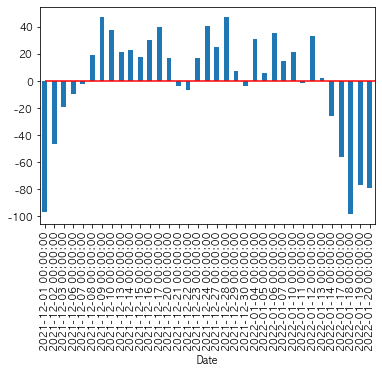

In [138]:
# 잔차 시각화
fitted_model.resid.plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=42, colors='red') #잔차는 0을 기준으로 생성되기 때문에 y=0의 선을 그어준다. (기준선 역할)
plt.show()

### 2-1 오차항의 등분산성

In [139]:
# yhat은 model 형성을 하면서 feature를 넣고 도출된 회귀값들임
yhat = fitted_model.fittedvalues
subset = pd.concat([yhat, target, fitted_model.resid], axis=1)
subset.columns = ['yhat', 'target', 'model_residual']

# 따라서 yhat, 전체형법범죄 데이터의 차이는 잔차 값으로 남아있음. (컬럼 자체를 연산하지 않았지만, 연산 결과는 잔차와 동일함)
# subset

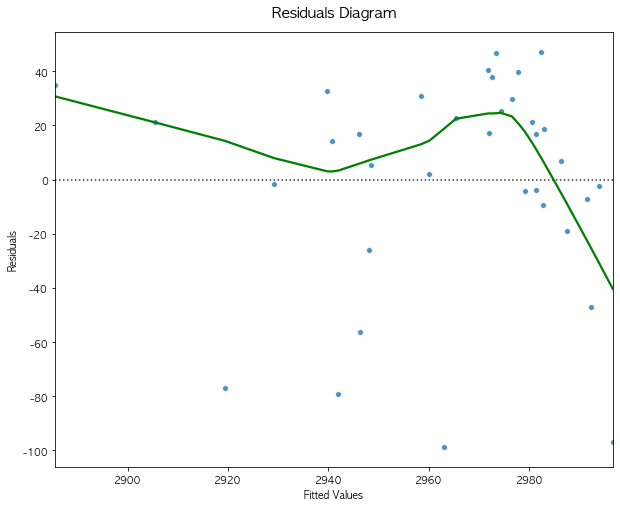

In [140]:
# 오차항의 등분산성을 확인하기 위한 플롯 형성
fig = plt.figure(figsize= (10,8))

# yhat값의 변화에 따라 오차항이 어떻게 변화하는지 육안으로 확인하는 부분 (등분산성은 yhat값과 무관하게 일정한 분산을 유지하는 형태로 도출됨)
sns.residplot(x = "yhat", y = "target", 
              data = subset, scatter_kws = {'edgecolor':"white"},
              lowess = True, line_kws = {"color":"green"})
plt.title("Residuals Diagram", fontsize=15, y=1.02)
plt.xlabel("Fitted Values")  
plt.ylabel("Residuals")
plt.show()

In [141]:
# 하나씩 시행해보기
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = sm.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

# 독립변수, featue의 values (endog는 y값)
# fitted_model.model.exog

for i in lzip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')
# which assumes independent and identically distributed
# error terms, or the original Breusch-Pagan version which assumes
# residuals are normally distributed.

# The null hypothesis (H0): Homoscedasticity is present.

Lag_range multiplier statistic :  0.271
p-value :  0.873
f-value :  0.125
f p-value :  0.883


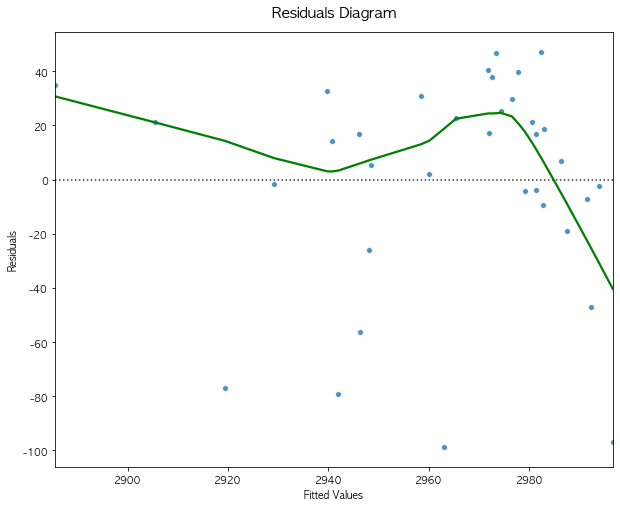

Lag_range multiplier statistic :  0.271
p-value :  0.873
f-value :  0.125
f p-value :  0.883
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [142]:
def bp_test(fitted_model, sig_level):
    # 라이브러리 호출
    from statsmodels.compat import lzip
    from statsmodels.stats.api import het_breuschpagan
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 변수설정
    yhat = fitted_model.fittedvalues
    subset = pd.concat([yhat, target], axis=1)
    subset.columns = ['yhat', 'target']
    names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
    test = het_breuschpagan(fitted_model.resid, fitted_model.model.exog)
    
    # 오차항의 등분산성을 확인하기 위한 플롯 형성
    fig = plt.figure(figsize= (10,8))
    sns.residplot(x = "yhat", y = "target", 
                data = subset, scatter_kws = {'edgecolor':"white"},
                lowess = True, line_kws = {"color":"green"})
    plt.title("Residuals Diagram", fontsize=15, y=1.02)
    plt.xlabel("Fitted Values")  
    plt.ylabel("Residuals")
    plt.show()

    for i in lzip(names, test):
        print(f'{i[0]} : {i[1] : .3f}')
        
    if test[1] > sig_level:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        print(f'오차항이 이분산(Heteroscedasticity)을 따르므로 선형회귀 모형의 가정에 어긋납니다.')

bp_test(fitted_model, 0.05)

In [143]:
# 이분산 검정 추가 (white test)
from statsmodels.stats.api import het_white

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(fitted_model.resid, fitted_model.model.exog)

print(dict(zip(labels, white_test)))

# Null (H0): Homoscedasticity is present (residuals are equally scattered)
# Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

{'Test Statistic': 4.532638385708793, 'Test Statistic p-value': 0.33869493583624644, 'F-Statistic': 1.1157772150795675, 'F-Test p-value': 0.36747455079909225}


### 2-2 오차항의 독립성

In [144]:
# 한줄씩 해보기
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model.resid)

0.35995258335255625

In [145]:
# 한줄씩 해보기
# 잔차 정의
resids=fitted_model.resid
# DW 통계치를 구하는 공식 적용 (시차 1 적용)
diff_resids = np.diff(resids, 1, axis=0)
dw = np.sum(diff_resids**2, axis=0) / np.sum(resids**2, axis=0)
# dw 통계치 도출 완료
dw

0.35995258335255625

#### DW 검정에 대한 설명
The test statistic is approximately equal to 2*(1-r) where ``r`` is the
sample autocorrelation of the residuals. Thus, for r == 0, indicating no
serial correlation, the test statistic equals 2. This statistic will
always be between 0 and 4. The closer to 0 the statistic, the more
evidence for positive serial correlation. The closer to 4, the more
evidence for negative serial correlation.

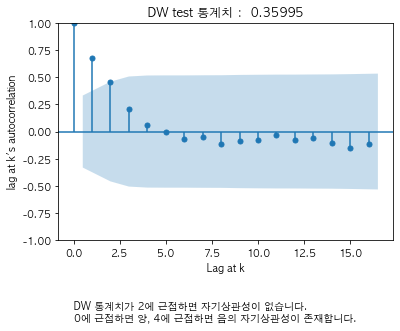

In [146]:
def autocorr_resid(fitted_model):
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson

    # 오차항의 자기상관성 검정
    plot_acf(fitted_model.resid)
    plt.xlabel('Lag at k')
    plt.ylabel("lag at k's autocorrelation")
    plt.title(f'DW test 통계치 : {durbin_watson(resids=fitted_model.resid) : .5f}')
    plt.text(y=-1.75,x=0, s='DW 통계치가 2에 근접하면 자기상관성이 없습니다.\n0에 근접하면 양, 4에 근접하면 음의 자기상관성이 존재합니다.')
    plt.show()

autocorr_resid(fitted_model)   

### 2-3. 오차항의 정규성

In [147]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)
from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(fitted_model.resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  8.35083
p값 :  0.01537


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


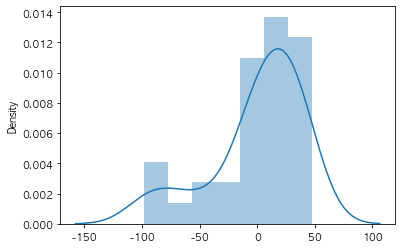

In [148]:
# 오차항 시각화
sns.distplot(fitted_model.resid)
plt.show()

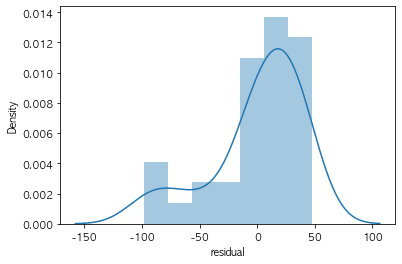

검정통계치 :  8.35083
p값 :  0.01537
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.


In [149]:
def normal_test(fitted_model, sig_level):
    # 정규성 검정 (귀무가설 : 정규성를 따른다)
    from scipy.stats import jarque_bera
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    sns.distplot(fitted_model.resid)
    plt.xlabel('residual')
    plt.show()
    
    statistic, pvalue = jarque_bera(fitted_model.resid)
    print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')
    if pvalue > sig_level:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        
normal_test(fitted_model, .05)


## 3. 변수선택법

In [152]:
# 삼성전자, 하이닉스, 네이버, 카카오 KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','000660.KS','035420.KS','035720.KS','^KS11'}, '2021-12-01', '2022-01-21')

[*********************100%***********************]  5 of 5 completed


### 3-1. 전진선택법

In [153]:
# 하나씩 해보기
## 전진 단계별 선택법

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 변수 설정
target = stock_price['Adj Close']['^KS11']
ks11 = []
ks11.append([stock_price.columns[5*i+4] for i in range(6)])
feature = stock_price.drop(columns=ks11[0])
variables = feature.columns.tolist()
y = target

# 선택된 변수들 list 생성
forward_valriables = []

# 전진선택시 P 값을 고려할 때, 선택과 제거 임계치 설정    
sl_enter = 0.05
sl_remove = 0.05

# 각 스텝별로 선택된 변수들
sv_per_step = [] 
# 각 스텝별 수정된 결정계수
adj_r_squared_list = []
# 스텝
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[forward_valriables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit(disp=0)
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = feature[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_valriables.copy())
    else:
        break

In [154]:
# 최종 모형 도출
X = sm.add_constant(stock_price[forward_valriables])
model = sm.OLS(y, X).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     81.12
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           9.03e-15
Time:                        16:51:29   Log-Likelihood:                -146.38
No. Observations:                  35   AIC:                             300.8
Df Residuals:                      31   BIC:                             307.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        734.6837    187.354      3.921      0.000     352.572    1116.795
('Low', '035420.KS')           0.0020      0.000     12.997      0.000       0.002       0.002
('Adj Close', '005930.KS')     0.0190      0.002      8.846      0.000       0.015       0.023
('Volume', '035420.KS')     4.902e-05   1.42e-05      3.464      0.002    2.02e-05    7.79e-05
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.618
Skew:                           0.422   Prob(JB):                        0.445
Kurtosis:                       2.369   Cond. No.                     4.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

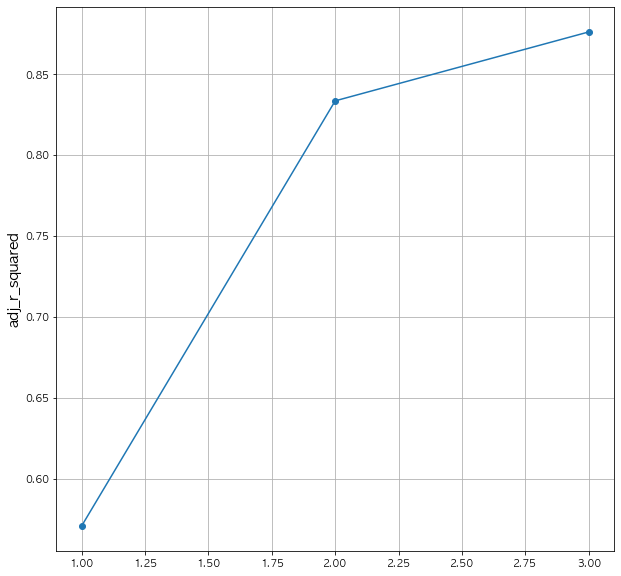

In [155]:
# 스텝별로 조정된 결정계수를 출력하는 표 시각화
fig = plt.figure(figsize=(10,10))
plt.plot(steps, adj_r_squared_list, marker='o')
plt.ylabel('adj_r_squared',fontsize=15)
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     81.12
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           9.03e-15
Time:                        16:51:34   Log-Likelihood:                -146.38
No. Observations:                  35   AIC:                             300.8
Df Residuals:                      31   BIC:                             307.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

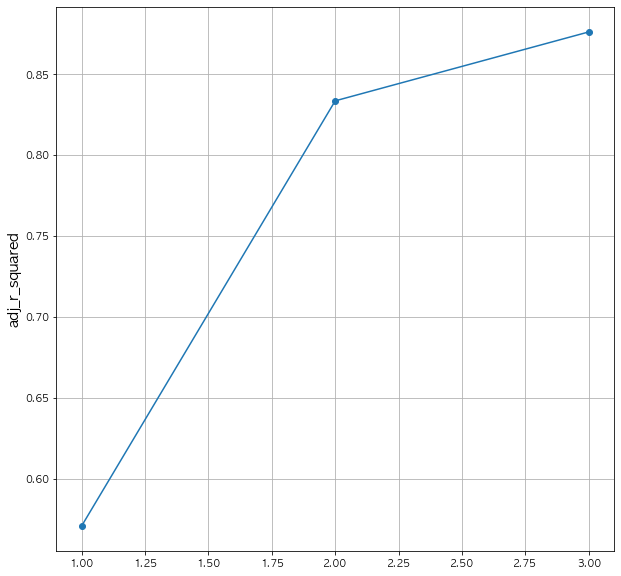

In [156]:
def forward_feature_selection(feature, target, sl_enter=.05, sl_remove=.05):
    ## 전진 단계별 선택법

    import statsmodels.api as sm
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    # 변수 설정
    variables = feature.columns.tolist() 
    # 선택된 변수들 list 생성
    forward_valriables = []
    # 각 스텝별로 선택된 변수들
    sv_per_step = [] 
    # 각 스텝별 수정된 결정계수
    adj_r_squared_list = []
    # 스텝
    steps = []
    step = 0

    while len(variables) > 0:
        remainder = list(set(variables) - set(forward_valriables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[forward_valriables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(target,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            forward_valriables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(forward_valriables) > 0:
                selected_X = feature[forward_valriables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(target,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    forward_valriables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(target,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
            adj_r_squared_list.append(adj_r_squared)
            sv_per_step.append(forward_valriables)
        else:
            break

    # 최종 모형 도출
    model = sm.OLS(target, sm.add_constant(stock_price[forward_valriables])).fit(disp=0)
    print(model.summary())

    # 스텝별로 조정된 결정계수를 출력하는 표 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()
    
    return model
    
forward_model = forward_feature_selection(feature, target)

### 3-2 후진제거법

                            OLS Regression Results                            
Dep. Variable:                  ^KS11   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     67.22
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           4.21e-14
Time:                        16:51:37   Log-Likelihood:                -118.88
No. Observations:                  35   AIC:                             265.8
Df Residuals:                      21   BIC:                             287.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

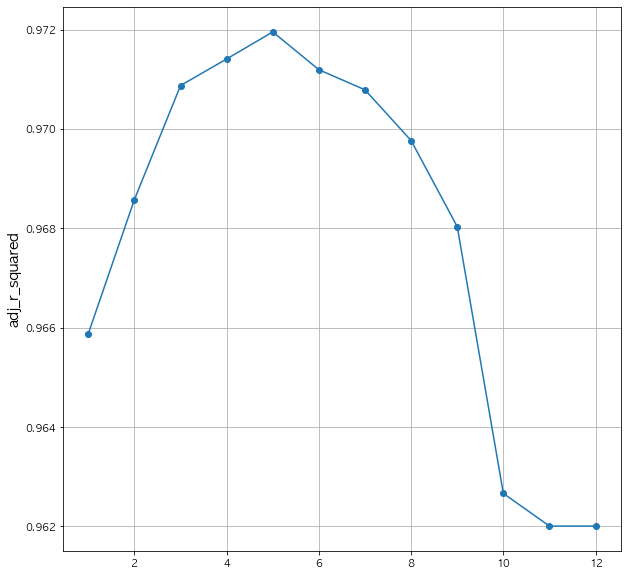

In [157]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())

    
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(feature, target)

### 3-3 단계적 선택법

                            OLS Regression Results                            
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     81.12
Date:                Wed, 30 Mar 2022   Prob (F-statistic):           9.03e-15
Time:                        16:51:40   Log-Likelihood:                -146.38
No. Observations:                  35   AIC:                             300.8
Df Residuals:                      31   BIC:                             307.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

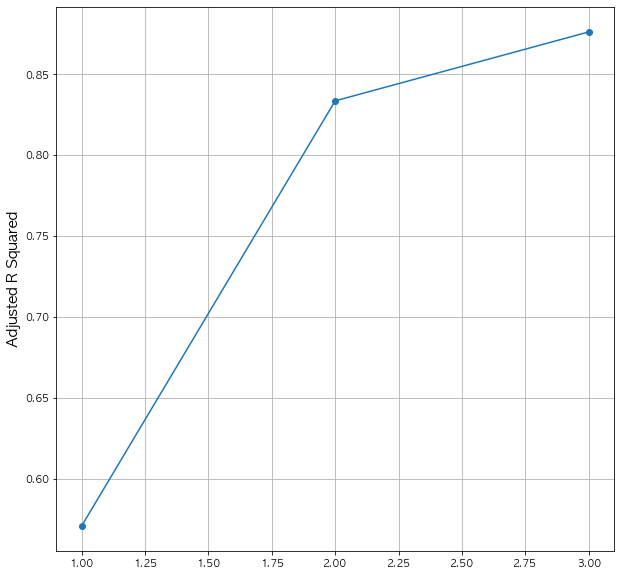

In [158]:
def stepwise_feature_selection(feature, target, variables=feature.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    model = sm.OLS(y, sm.add_constant(feature[selected_variables])).fit()
    print(model.summary())
    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps,adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

stepwise_model = stepwise_feature_selection(feature, target)